<h1>Experimento</h1>

In [1]:
%pylab inline
import scipy.stats as stats

Populating the interactive namespace from numpy and matplotlib


<h2>Propuesta</h2>
<p>El experimento propuesto es el siguiente:</p>
<ul> 
<li>Se realiza una marcha aleatoria en una dimensión. La posición inicial es $x = 0$ y cada paso se toma de una distribución nornal con media $0$ y desviación estándar $0.5$. La marcha consiste de 100 pasos.</li>
<li>Cada experimento consiste de $n = 1000$ marchas aleatorias, obteniendo así una distribución de posiciones finales que, según el teorema del límite central, deberían comportarse como una normal. En particular, la media de las posiciones finales debería ser 0.</li>
<li>Se realiza una prueba de hipótesis para corroborar que hay suficiente evidencia estadística para poder decir que la media es cero. La hipótesis nula es entonces: $$H_0:\bar{\mu} = 0$$ La hipótesis alterna es:$$H_1:\bar{\mu} \neq 0$$ Por lo que la prueba de hipótesis es una de dos colas (hecho que será importante a la hora de calcular el $p$ $value$). Se utiliza entonces el estadístico $t$ como se describe en <a href="http://stattrek.com/hypothesis-test/mean.aspx?Tutorial=AP">Stat Trek</a>: $$t = \frac{\bar{\mu} - \mu}{SE}$$ Donde $$SE = \frac{s}{\sqrt{n}}$$ A partir del estadístico $t$, se obtiene finalmente el $p$ $value$ teniendo en cuenta que los grados de libertad son $n-1$</li>
<li>Se realizan 1000 de estos experimentos (es decir, 1000 pruebas de hipótesis) para finalmente obtener una distribución para el estadístico $t$ y para el $p$ $value$.</li>
</ul>

In [15]:
num_steps = 100
num_repetitions = 1000
num_experiments = 1000

In [22]:
p_values = zeros(num_experiments)
t_stats = zeros(num_experiments)

mins = zeros(num_experiments)
maxs = zeros(num_experiments)
averages = zeros(num_experiments)

minimum_p = 1000
maximum_p = -1000
minimum_p_array = zeros(num_repetitions)
maximum_p_array = zeros(num_repetitions)

for k in range(num_experiments):
    final_positions = zeros(num_repetitions)
    for i in range(num_repetitions):
        x = 0
        for j in range(num_steps):
            mu, sigma = 0, 0.05
            my_step = random.normal(mu, sigma)
            x = x + my_step;
        final_positions[i] = x
    mu_expected = 0
    mu_observed = mean(final_positions)
    s = std(final_positions)
    n = len(final_positions)
    t_stat = (mu_observed - mu_expected)/(s/sqrt(n))
    #El dos hace referencia a que la prueba de hipotesis es de dos colas
    p_values[k] = 2*stats.t.sf(abs(t_stat), n-1)
    t_stats[k] = t_stat
    mins[k] = min(p_values[:k+1])
    maxs[k] = max(p_values[:k+1])
    averages[k] = mean(p_values[:k+1])
    
    if p_values[k] < minimum_p:
        minimum_p = p_values[k]
        minimum_p_array = final_positions
    elif p_values[k] > maximum_p:
        maximum_p = p_values[k]
        maximum_p_array = final_positions

<h2>Distribución de $p$ $values$</h2>
<p>Primero, se caracterizan algunas de las propiedades de la distribución (mínimo, máximo, media) en función del número de experimentos. Se observa una gran variación entre el máximo y el mínimo.</p>
<p>Si el nivel de significancia de la prueba se toma de $5\%$, la hipótesis alterna puede recharzarse si el $p$ $value$ es mayor a $0.05$ (se toma mayor y no menor gracias al funcionamiento de stats.t.sf()). Note que el mínimo se acerca peligrosamente a ser menor a tal valor y, como se verá más adelante, puede llegar a serlo.

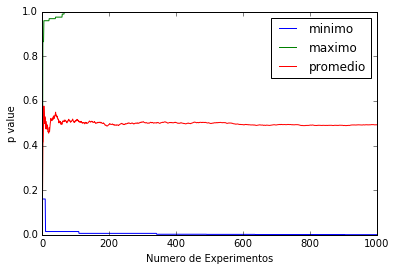

In [27]:
plot(mins)
plot(maxs)
plot(averages)
xlabel('Numero de Experimentos')
ylabel('p value')
plt.legend(['minimo', 'maximo', 'promedio'], loc='upper right')

<p>Segundo, se oberva la distribución de $p$ $values$, la cual se nota bastante uniforme.</p>

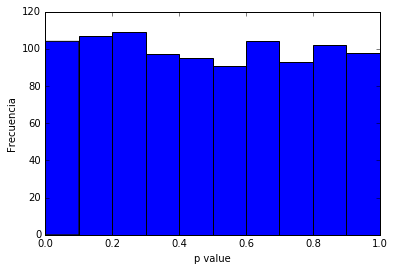

In [26]:
hist(p_values)
xlabel('p value')
ylabel('Frecuencia')

<p>Finalmente, se observan los casos extremos del $p$ $value$: cuando es mínimo y cuando es máximo. En el caso que se presenta, el mínimo alcanza a tener una significancia lo suficientemente pequeña como para poder decir que no se rechaza la hipótesis nula (pues no se cuenta con suficiente evidencia estadística como para hacerlo).</p>

minimo p value: 0.000602121381545
media: -0.0532574397523
s: 0.489343004981


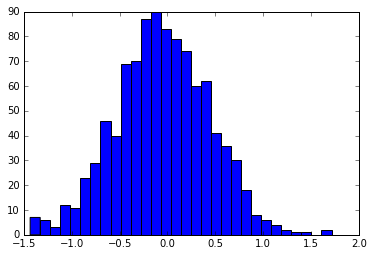

In [30]:
hist(minimum_p_array, bins=30)
print('minimo p value: ' + str(minimum_p))
print('media: ' + str(mean(minimum_p_array)))
print('s: ' + str(std(minimum_p_array)))

maximo p value: 0.998448771819
media: 3.13932956857e-05
s: 0.510495983879


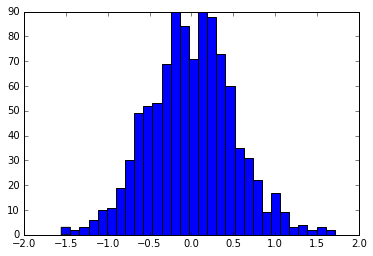

In [31]:
hist(maximum_p_array, bins=30)
print('maximo p value: ' + str(maximum_p))
print('media: ' + str(mean(maximum_p_array)))
print('s: ' + str(std(maximum_p_array)))

<h2>Distribución del estadístico $t$</h2>
<p>Se presenta la distribución para el estadístico t.</p>

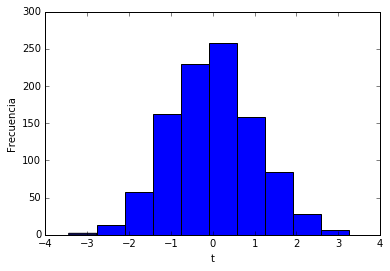

In [32]:
hist(t_stats)
xlabel('t')
ylabel('Frecuencia')

<p>El signo de $t$ indica si la media experimental es menor o mayor a la esperada. Si se quiere tener solamente una idea de la distancia de la media experimental a la esperada, se tiene la siguiente distribución:</p>

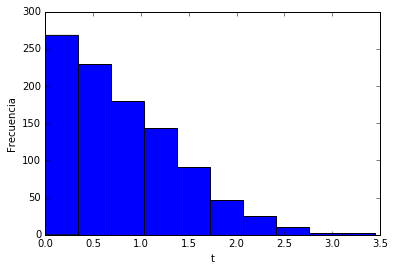

In [33]:
hist(abs(t_stats))
xlabel('t')
ylabel('Frecuencia')